# **Multi-Layer Perceptron Demo**

In order to perform gradient descent across a neural network, one needs to keep track of all the values in the nodes, and all of the partial derrivatives. For this reason a `Value` class is created, which takes on a tree structure. 

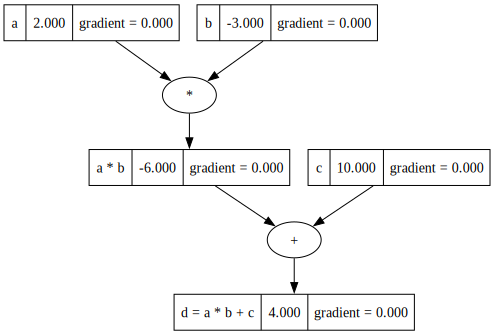

In [1]:
from visualization import draw_diagram
from value import Value


a = Value(2, 'a')
b = Value(-3, 'b')
c = Value(10, 'c')

d = a*b + c; d.symbol='d'
draw_diagram(d, 'TB')

The gradient $∇$ of each value is simply the partial derrivative of that value with respect to the total/final value. For example the gradient of $c$ is the partial derrivative of $d$ with respect to $c$

$$ ∇_c  = \frac{\partial d}{\partial c} $$

For values further down the tree the chain rule can be used. In the case of finding the gradient of $a$, the product of $a$ and $b$ can be considered as a `Value` $ab$

$$ \frac{\partial d}{\partial a} = \frac{\partial d}{\partial ab} \frac{\partial ab}{\partial a}$$

The chain rule always depends on the current operation and the operation that follows the current operation, which means one can start at the final value $d$ and fill in the gradient values going back down the tree


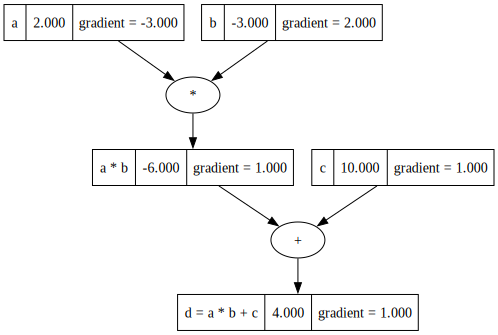

In [2]:
d.back_propogate()
draw_diagram(d, 'TB')


The `Value` class is used inside the `MLP` (multi-layer perceptron) class. This neural network can be be trained using training data `x_train` and `y_train`, after which it is able to predict any new value in the same shape as the original training data. 

In [3]:
from mlp import MLP

xs = [
    [2.,  3., -1.],
    [3., -1.,  .5],
    [.5,  1.,  1.],
    [1.,  1., -1.],
]

ys = [1., -1., -1., 1.]

network = MLP(xs, ys, hidden_layers=[(4, 'tanh'), (4, 'tanh')])
network.train(step_size=0.001)

y_pred = network.predict(xs)

[round(value.data, 1) for value in y_pred]

[1.0, -1.0, -1.0, 1.0]